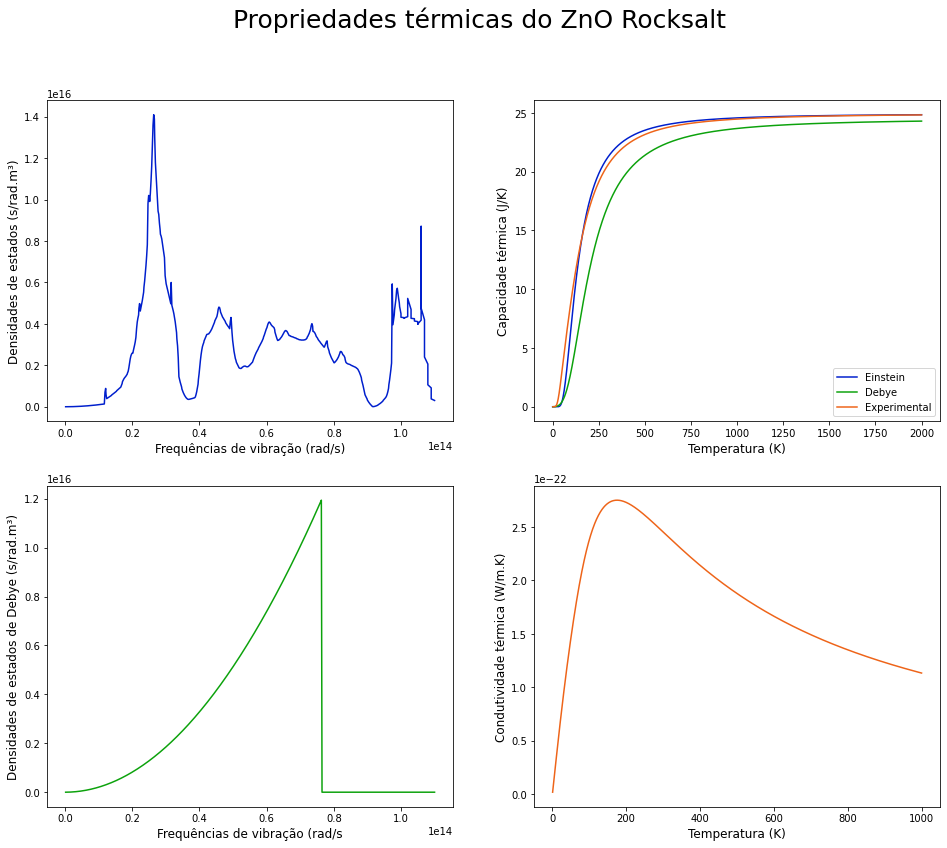

In [6]:
from extracaoDados import*
from modulo1 import*
from modulo2 import*
from modulo3 import*
from modulo4 import*
import warnings
import numpy as np
import matplotlib.pyplot as plt

'''o numpy gera um aviso de estar usando o exponencial de um grande numero,
mas o modulo lida normalmente com o calculo, logo podemos ignorar o aviso'''
warnings.filterwarnings('ignore')

#lendo os dados das frequências de vibração e densidades de estado do ZnO Rocksalt
arquivo_zno_rocksalt = open("dadosZnO_rocksalt.txt")
omega_zno_rs = []
densidade_estados_zno_rs = []
ler_dados(omega_zno_rs, densidade_estados_zno_rs, arquivo_zno_rocksalt)

#calculando a média das frequências de vibração para utilizar no modelo de Einstein
omega_zno_rs_einstein = sum(omega_zno_rs)/len(omega_zno_rs) 

#definindo uma faixa de temperaturas
temperaturas = np.linspace(0.01,2000,10000)

'''calculando as capacidades térmicas para os diferentes modelos, sabendo que a 
velocidade do som no ZnO é 4300 m/s (fonte:https://www.ipen.br/biblioteca/cd/ptech/2005/PDF/15_08.PDF)
e que sua densidade atômica é 1.02e29 átomos/m³'''

cv_zno_rs_einstein = cv_einstein(omega_zno_rs_einstein, 6.02e23,temperaturas)
cv_zno_rs_debye = cv_debye(omega_zno_rs, temperaturas, 4200, 6.02e23, 1.02e29)
cv_zno_rs_experimental = cv_densidade_experimental(omega_zno_rs, densidade_estados_zno_rs, temperaturas, 1.02e29)

#densidade de estados de Debye 
densidade_debye_zno_rs = densidade_debye(omega_zno_rs, 4200, 1.02e29)

#faixa de temperatruas para a condutividade térmica e o cálculo desta
k_temp = np.linspace(1,1000,2000)
k_zno_rs = condutiv(omega_zno_rs, k_temp, 4200, 1.02e29)


'''plotando as densidades de estados experimentais, os resultados das capacidades térmicas de 0.01 a 2000 K, 
a densidade de estados para o modelo de Debye e a condutividade térmica do Ócido de Zinco, de organização
estrutural do tipo Rocksalt de 1 a 1000K'''
fig, ax = plt.subplots(2,2, figsize=(16,13))

fig.suptitle('Propriedades térmicas do ZnO Rocksalt', size=25)

ax[0][0].plot(omega_zno_rs,densidade_estados_zno_rs, color="#001fcd")
ax[0][0].set_xlabel('Frequências de vibração (rad/s)', size=12)
ax[0][0].set_ylabel('Densidades de estados (s/rad.m³)', size=12)

ax[0][1].plot(temperaturas, cv_zno_rs_einstein, label='Einstein', color="#001fcd")
ax[0][1].plot(temperaturas, cv_zno_rs_debye, label='Debye', color="#0ca20c")
ax[0][1].plot(temperaturas, cv_zno_rs_experimental, label='Experimental', color="#ee6419")
ax[0][1].set_xlabel('Temperatura (K)', size=12)
ax[0][1].set_ylabel('Capacidade térmica (J/K)', size=12)
ax[0][1].legend()

ax[1][0].plot(omega_zno_rs, densidade_debye_zno_rs, color="#0ca20c")
ax[1][0].set_xlabel('Frequências de vibração (rad/s', size=12)
ax[1][0].set_ylabel('Densidades de estados de Debye (s/rad.m³)', size=12)

ax[1][1].plot(k_temp,k_zno_rs, color="#ee6419")
ax[1][1].set_xlabel('Temperatura (K)', size=12)
ax[1][1].set_ylabel('Condutividade térmica (W/m.K)', size=12)

plt.show()